# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

# Some business Objectives:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.
- Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

## Data Analysis Process
#### Remember the process:

- **Case Study**
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting


# Instructions

1. Import the necessary libraries.

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

3. First look at its main features (head, shape, info). **NOTE**   The target column is _total_claim_amount_

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

5. Change effective to date column to datetime format.

6. Create a NEW dataframe using only the numerical data called _numerical_df_.  **Use this for the following questions**.

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

7. Plot a correlation matrix, comment what you see.

8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

9. Comment what you can see in the plots.

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. Also, remove them from your **main** dataframe.

12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#1 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
#2 First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#4
customer_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [4]:
# Display the first few rows of the DataFrame
print(customer_df.head())

# Get the shape of the DataFrame (rows, columns)
print("Shape of the DataFrame:", customer_df.shape)

# Get information about the DataFrame including data types and non-null values
print(customer_df.info())


  Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   
3           1/20/11       Unemployed      M       0  ...   
4            2/3/11         Employed      M   43836  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1

In [5]:
# 4 Rename the columns to snake case
customer_df = customer_df.rename(columns=lambda x: x.lower().replace(' ', '_'))

# Display the updated column names
print(customer_df.columns)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


In [6]:

# 5 Assuming customer_df is your DataFrame
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Check the data type of the column to confirm it's in datetime format
print(customer_df['effective_to_date'].dtype)


datetime64[ns]


In [7]:
#6 Select numerical data
numerical_df = customer_df.select_dtypes(include=['number'])

# Display the first few rows of the numerical DataFrame
print(numerical_df.head())


   customer_lifetime_value  income  monthly_premium_auto  \
0              2763.519279   56274                    69   
1              6979.535903       0                    94   
2             12887.431650   48767                   108   
3              7645.861827       0                   106   
4              2813.692575   43836                    73   

   months_since_last_claim  months_since_policy_inception  \
0                       32                              5   
1                       13                             42   
2                       18                             38   
3                       18                             65   
4                       12                             44   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                   1          384.811147  
1                          0                   8         1131.464935  
2                          0                   2          5

In [8]:
# 7 
def categorize_variables(data_frame, threshold=50):
    continuous_vars = []
    discrete_vars = []

    for column in data_frame.columns:
        unique_count = data_frame[column].nunique()
        if unique_count > threshold:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

    return continuous_vars, discrete_vars

continuous_df, discrete_df = categorize_variables(numerical_df)
continuous_df, discrete_df 

print("Continuous Variables:")
print(continuous_df)

print("\nDiscrete Variables:")
print(discrete_df)



Continuous Variables:
['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']

Discrete Variables:
['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']


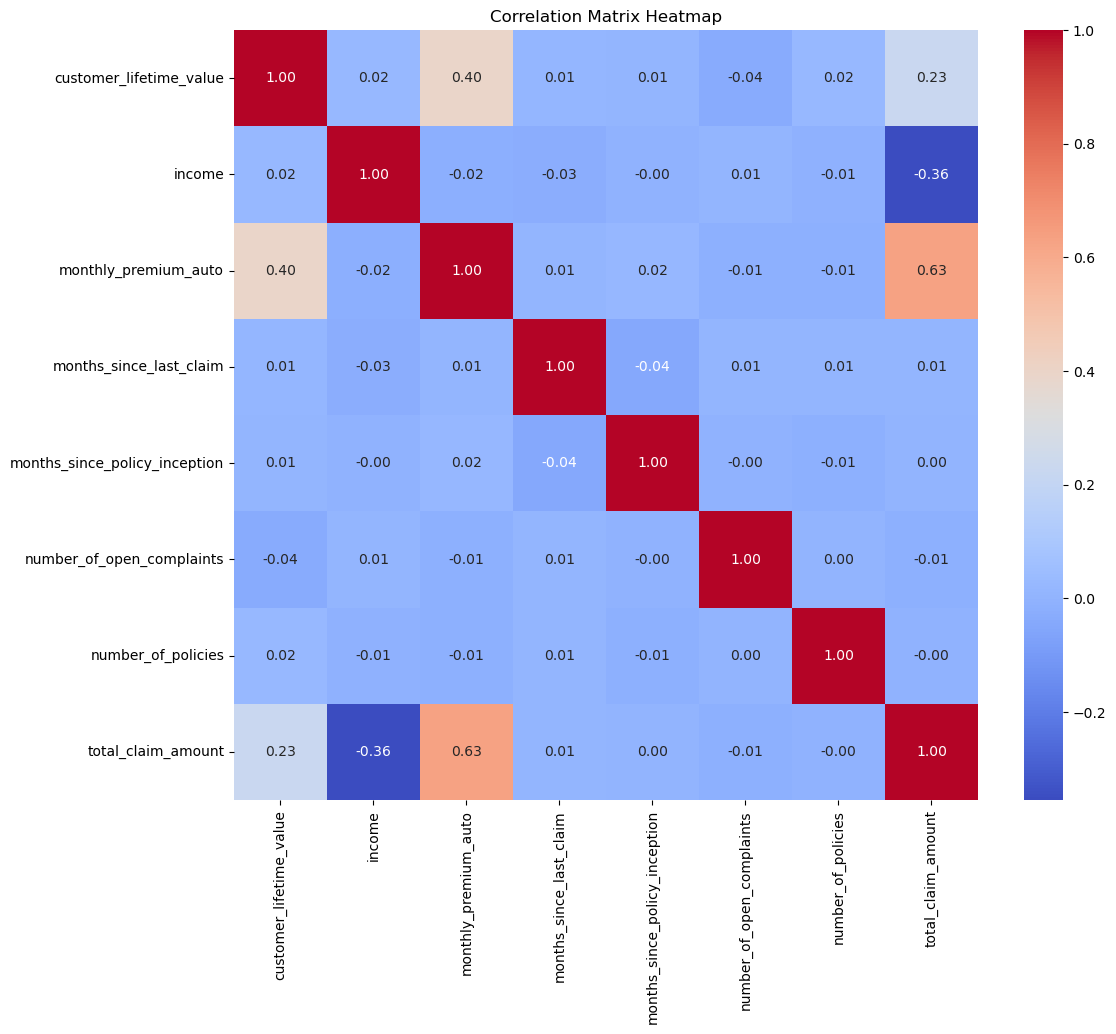

In [9]:
#8 
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [10]:
#9

import seaborn as sns
import matplotlib.pyplot as plt

def plot_variable_distributions(dataframe):
    for var in dataframe.columns:
        if dataframe[var].dtype == 'object':
            # Plot categorical (discrete) variables
            plt.figure(figsize=(8, 4))
            sns.countplot(data=dataframe, x=var, order=dataframe[var].value_counts().index)
            plt.title(f'Distribution of {var}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            # Plot numerical (continuous) variables
            plt.figure(figsize=(8, 4))
            sns.histplot(data=dataframe, x=var, kde=True)
            plt.title(f'Distribution of {var}')
            plt.show()


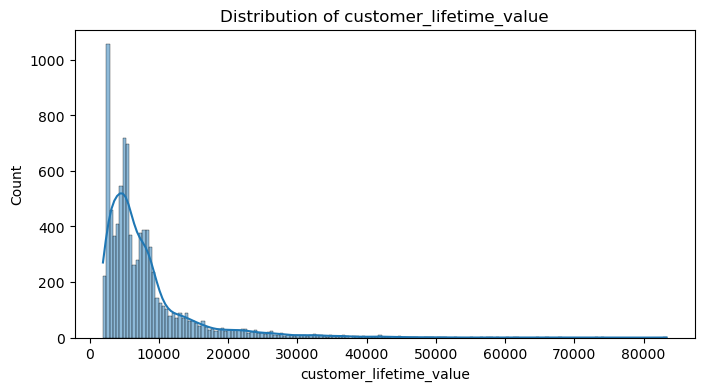

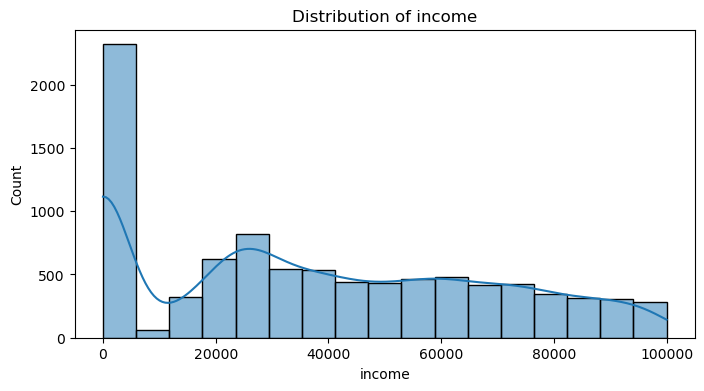

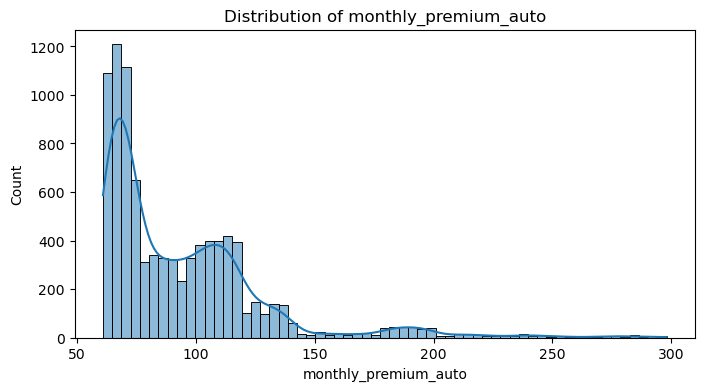

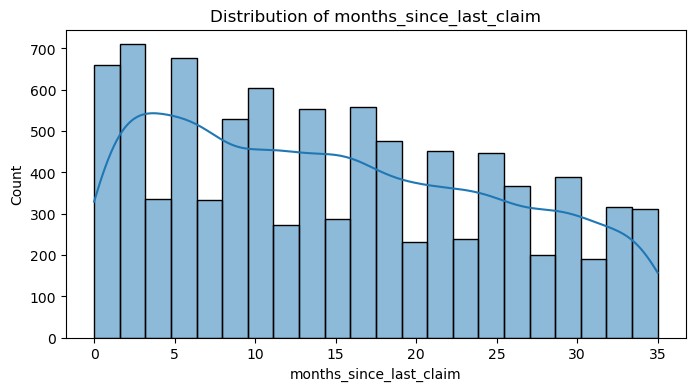

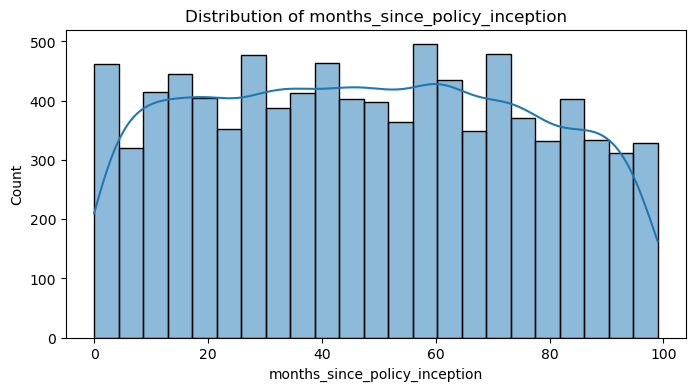

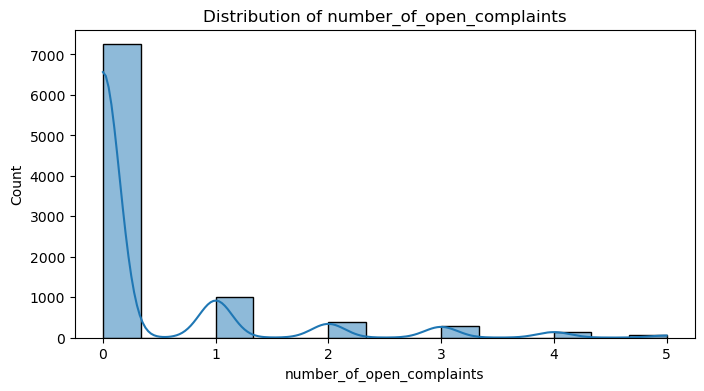

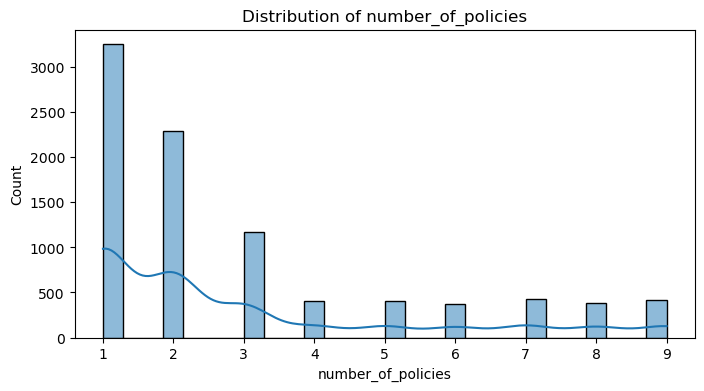

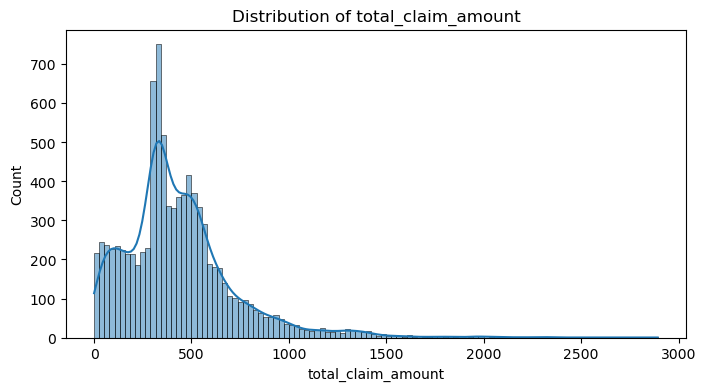

In [11]:
# Plot variable distributions
plot_variable_distributions(numerical_df)


In [12]:
#10

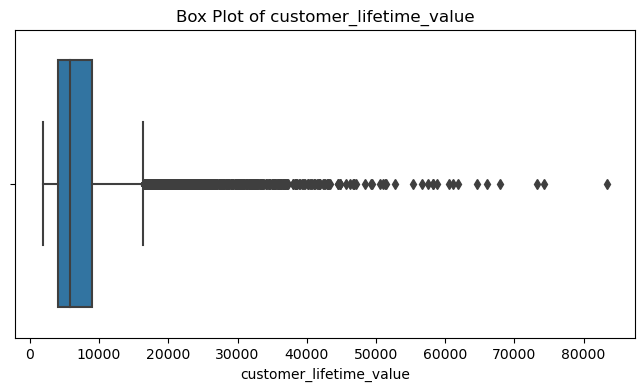

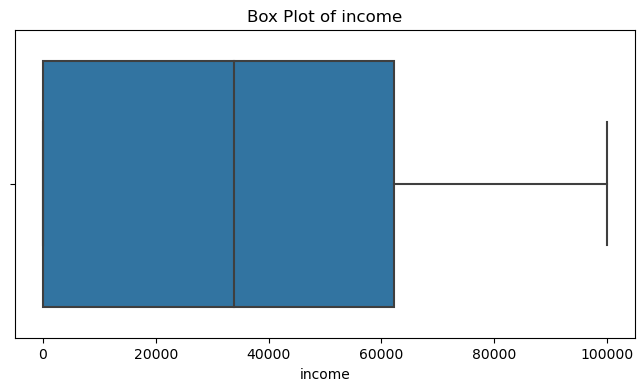

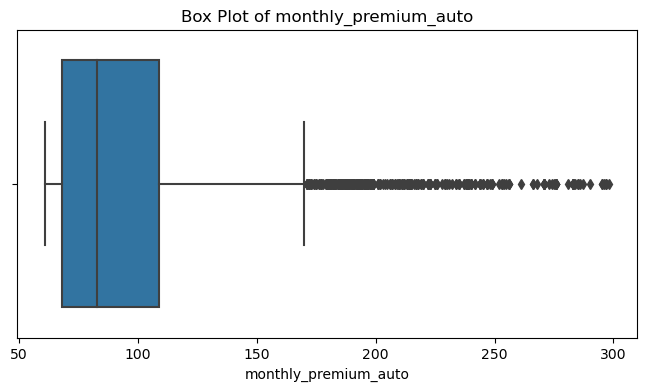

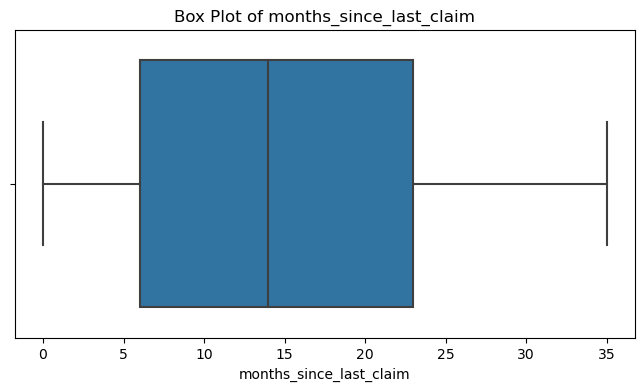

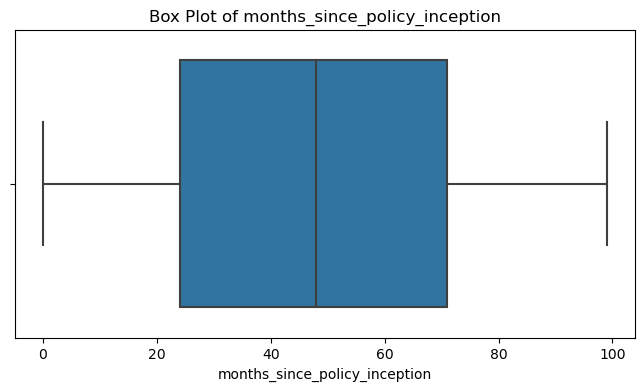

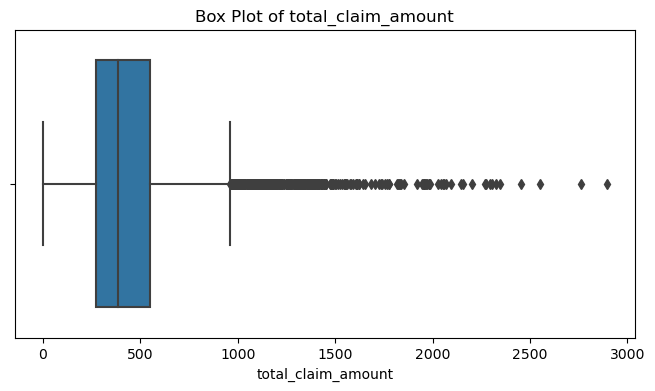

In [13]:
# 11 Define the function to plot continuous variables
def plot_continuous_variables(data, continuous_vars):
    for column in continuous_vars:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')
        plt.show()

# Create a list of continuous variables
continuous_vars = [col for col in numerical_df.columns if len(numerical_df[col].unique()) > 10]
continuous_vars

# Plot the box plots for continuous variables
plot_continuous_variables(numerical_df, continuous_vars)


In [14]:

# 12 Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Define continuous variables
continuous_vars = ['customer_lifetime_value', 'income', 'total_claim_amount', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

# Remove outliers for each continuous variable
for var in continuous_vars:
    numerical_df = remove_outliers_iqr(numerical_df, var)

# Confirm the shape after removing outliers
print("Shape after removing outliers:", numerical_df.shape)

# Now you have a cleaned numerical_df without the identified outliers


Shape after removing outliers: (5895, 8)


In [15]:
#13  

# Check for NaN values in each column
nan_counts = customer_df.isna().sum()
nan_percentage = (nan_counts / len(customer_df)) * 100

# Create a DataFrame to display NaN information
nan_info = pd.DataFrame({'Total NaN': nan_counts, 'Percentage of NaN': nan_percentage})
nan_info = nan_info.sort_values(by='Percentage of NaN', ascending=False)

# Display columns with NaN values and their respective percentages
print("Columns with NaN values:")
print(nan_info[nan_info['Total NaN'] > 0])

# Handle NaN values based on the analysis
# Example: You can choose to impute or drop columns with a significant number of NaN values.


Columns with NaN values:
Empty DataFrame
Columns: [Total NaN, Percentage of NaN]
Index: []


In [16]:
numerical_df.to_csv('numerical.csv', index=False)


![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning categorical data

For this lab, we will be using the same notebook as in the previous lab.

## Data Analysis Process
#### Remember the process:

- Case Study
- **Get data**
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

### Instructions

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find  all of the categorical data.  Save it in a categorical_df variable.

3. Check for NaN values and decide what to do with them, do it now.

4. Check all unique values of columns.

5. Check dtypes. Do they all make sense as categorical data?

6. Does any column contain alpha and numeric data?  Decide how to clean it and do it now.

7. Would you choose to do anything else to clean or wrangle the categorical data?  Comment your decisions and do it now.

8. Compare policy_type and policy.  What information is contained in these columns.  Can you identify what is important?  

9. Check number of unique values in each column, can they be combined in any way to ease encoding?  Comment your thoughts and make those changes.

10.  Save the cleaned catagorical dataframe as categorical.csv   You will use this file again this week.


In [17]:
#2
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [25]:
#3 
# Check for NaN values in categorical_df
nan_values = categoricals.isnull().sum()
nan_values

# Display columns with NaN values and their respective counts
print(nan_values[nan_values > 0])

# Decide what to do with the NaN values
# Depending on the specific column and dataset, you can consider various approaches:
# 1. Drop rows with NaN values: categorical_df.dropna()
# 2. Fill NaN values with a specific value: categorical_df.fillna(value)
# 3. Impute missing values using a strategy like mode or a custom approach

# Example: Filling NaN values with a specific value (e.g., "Unknown")
categoricals.fillna("Unknown", inplace=True)


Series([], dtype: int64)


In [26]:
categoricals.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [27]:
#4 
# Iterate through columns and print unique values
for column in categoricals.columns:
    unique_values = categoricals[column].unique()
    print(f"Unique values in {column} column: {unique_values}")


Unique values in customer column: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values in state column: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values in response column: ['No' 'Yes']
Unique values in coverage column: ['Basic' 'Extended' 'Premium']
Unique values in education column: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values in employmentstatus column: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values in gender column: ['F' 'M']
Unique values in location_code column: ['Suburban' 'Rural' 'Urban']
Unique values in marital_status column: ['Married' 'Single' 'Divorced']
Unique values in policy_type column: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values in policy column: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values in renew_offer_type column: ['Offer1' 'Offer3' 'Offer

In [28]:
# 5 Check data types of columns
column_dtypes = categoricals.dtypes

# Print data types and unique values for each column
for column, dtype in column_dtypes.iteritems():
    unique_values = categoricals[column].unique()
    print(f"Column: {column}, Data Type: {dtype}, Unique Values: {unique_values}")


Column: customer, Data Type: object, Unique Values: ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Column: state, Data Type: object, Unique Values: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Column: response, Data Type: object, Unique Values: ['No' 'Yes']
Column: coverage, Data Type: object, Unique Values: ['Basic' 'Extended' 'Premium']
Column: education, Data Type: object, Unique Values: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Column: employmentstatus, Data Type: object, Unique Values: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Column: gender, Data Type: object, Unique Values: ['F' 'M']
Column: location_code, Data Type: object, Unique Values: ['Suburban' 'Rural' 'Urban']
Column: marital_status, Data Type: object, Unique Values: ['Married' 'Single' 'Divorced']
Column: policy_type, Data Type: object, Unique Values: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Column: policy, Data Type: object, Unique Values

In [29]:
#6 


# Sample data for illustration (replace with your actual data)
data = {'Column1': ['A1', 'B2', 'C3', 'D4', 'E5'],
        'Column2': ['F6', 'G7', 'H8', 'I9', 'J10']}

# Create a DataFrame
df = pd.DataFrame(data)

# Loop through columns to check if they contain alphanumeric data
for column in df.columns:
    if df[column].str.contains(r'\d').any() and df[column].str.contains(r'[A-Za-z]').any():
        # If the column contains both text and numeric data
        # You can choose to clean it in a specific way
        # For example, remove non-numeric characters
        df[column] = df[column].str.replace(r'[^0-9]', '', regex=True)

# Print the cleaned DataFrame
print(df)



  Column1 Column2
0       1       6
1       2       7
2       3       8
3       4       9
4       5      10


In [30]:
customer_df['combined_policy'] = customer_df['policy_type'] + '_' + customer_df['policy']
customer_df['combined_policy']

0       Corporate Auto_Corporate L3
1         Personal Auto_Personal L3
2         Personal Auto_Personal L3
3       Corporate Auto_Corporate L2
4         Personal Auto_Personal L1
                   ...             
9129      Personal Auto_Personal L1
9130    Corporate Auto_Corporate L3
9131    Corporate Auto_Corporate L2
9132      Personal Auto_Personal L2
9133    Corporate Auto_Corporate L3
Name: combined_policy, Length: 9134, dtype: object

In [31]:
# Drop the original columns if necessary
# Replace 'actual_policy_type_column' and 'actual_policy_column' with the actual column names
customer_df = customer_df.drop(['policy_type', 'policy'], axis=1)
customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,combined_policy
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,32,5,0,1,Offer1,Agent,384.811147,Two-Door Car,Medsize,Corporate Auto_Corporate L3
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,13,42,0,8,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Personal Auto_Personal L3
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,18,38,0,2,Offer1,Agent,566.472247,Two-Door Car,Medsize,Personal Auto_Personal L3
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,18,65,0,7,Offer1,Call Center,529.881344,SUV,Medsize,Corporate Auto_Corporate L2
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,12,44,0,1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Personal Auto_Personal L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,18,89,0,2,Offer2,Web,198.234764,Four-Door Car,Medsize,Personal Auto_Personal L1
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,14,28,0,1,Offer1,Branch,379.200000,Four-Door Car,Medsize,Corporate Auto_Corporate L3
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,9,37,3,2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Corporate Auto_Corporate L2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,34,3,0,3,Offer3,Branch,691.200000,Four-Door Car,Large,Personal Auto_Personal L2


In [32]:
#9 

categoricals.to_csv('categorical.csv', index=False)
categoricals

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


##![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

## Data Analysis Process
#### Remember the process:

- Case Study
- Get data
- **Cleaning/Wrangling/EDA**
- Processing Data
- Modeling
 -Validation
- Reporting

### Instructions

1. Open the `categorical` dataframe we created before.
2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?  
    Make any changes you feel are necessary.
4. Plot time variable. Can you extract something from it?
5. The time variable can be useful. You shoud transform its data into a more useful form.
    Hint: Day, week, and month as integers might be useful.


In [33]:
#1 
import pandas as pd

# Load the categorical dataframe from the 'categorical.csv' file
categorical_df = pd.read_csv('categorical.csv')

# Display the first few rows of the dataframe
print(categorical_df.head())



  customer       state response  coverage education employmentstatus gender  \
0  BU79786  Washington       No     Basic  Bachelor         Employed      F   
1  QZ44356     Arizona       No  Extended  Bachelor       Unemployed      F   
2  AI49188      Nevada       No   Premium  Bachelor         Employed      F   
3  WW63253  California       No     Basic  Bachelor       Unemployed      M   
4  HB64268  Washington       No     Basic  Bachelor         Employed      M   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   
3      Suburban        Married  Corporate Auto  Corporate L2           Offer1   
4         Rural         Single   Personal Auto   Personal L1           Offer1   

  sales_channel  vehicle_class vehicle

In [35]:


# Now, you can drop the 'customer' column if it exists
if 'customer' in categoricals.columns:
    categoricals = categoricals.drop(['customer'], axis=1)

# Continue with your analysis


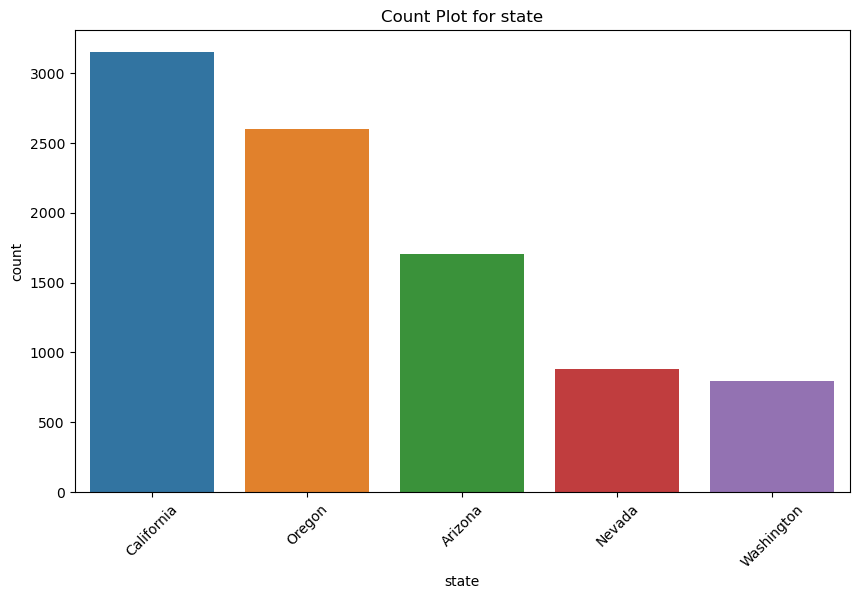

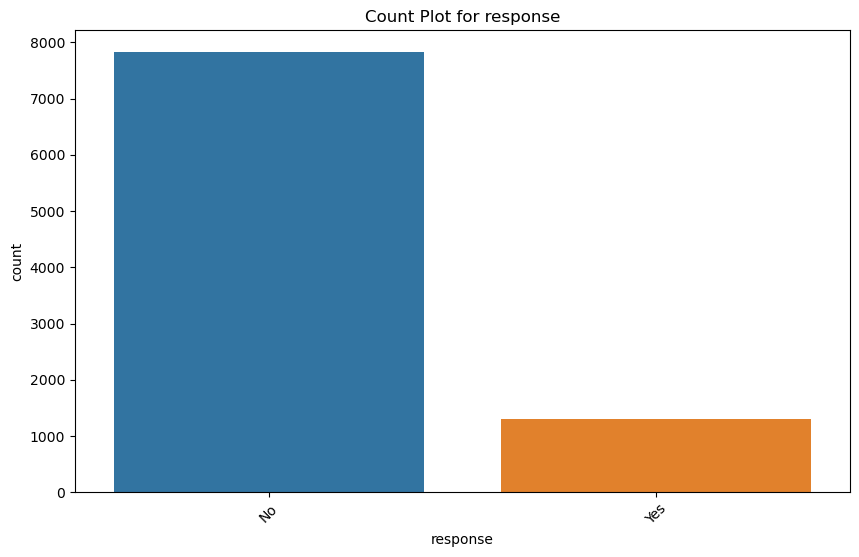

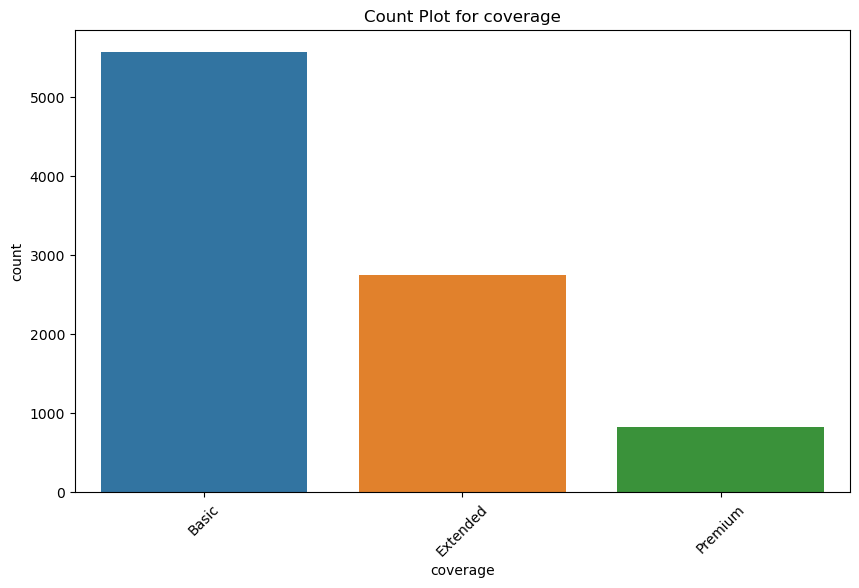

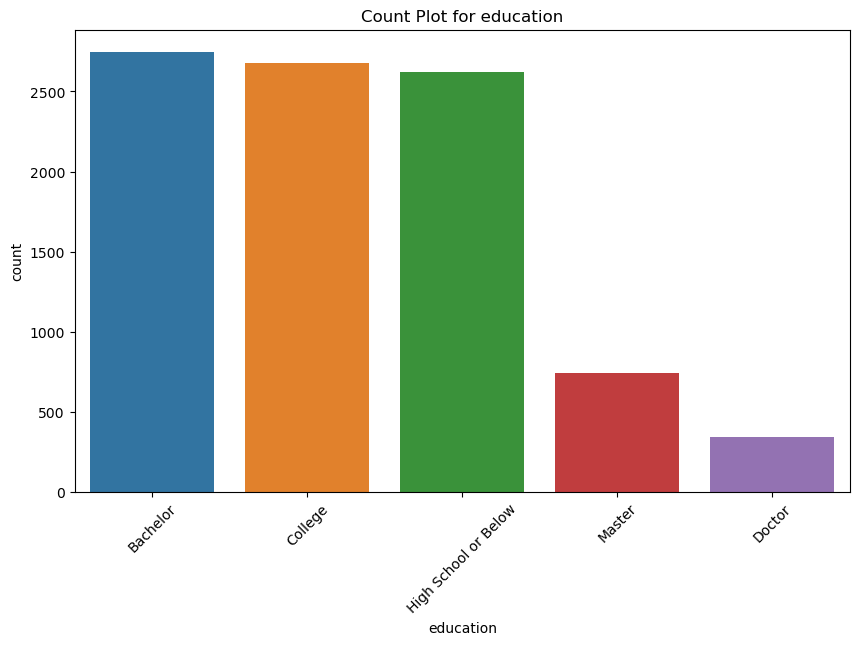

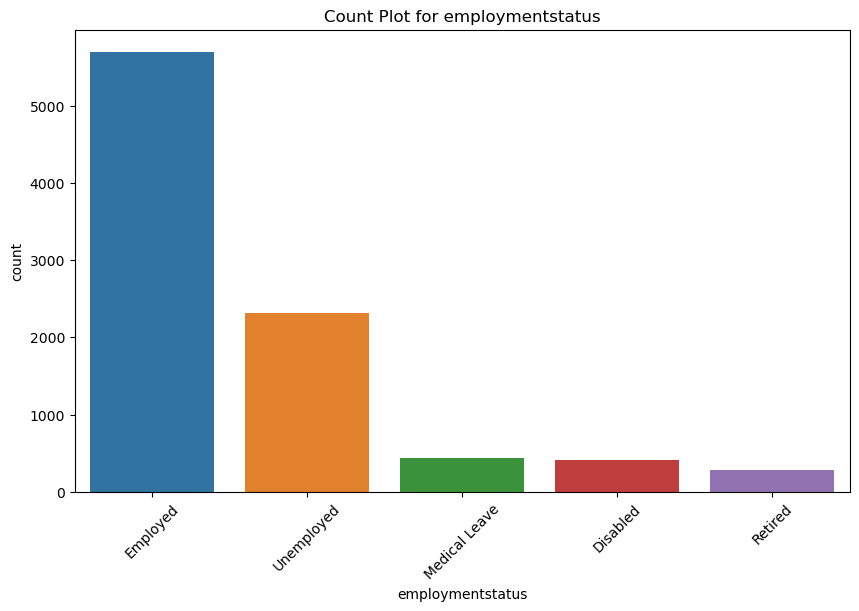

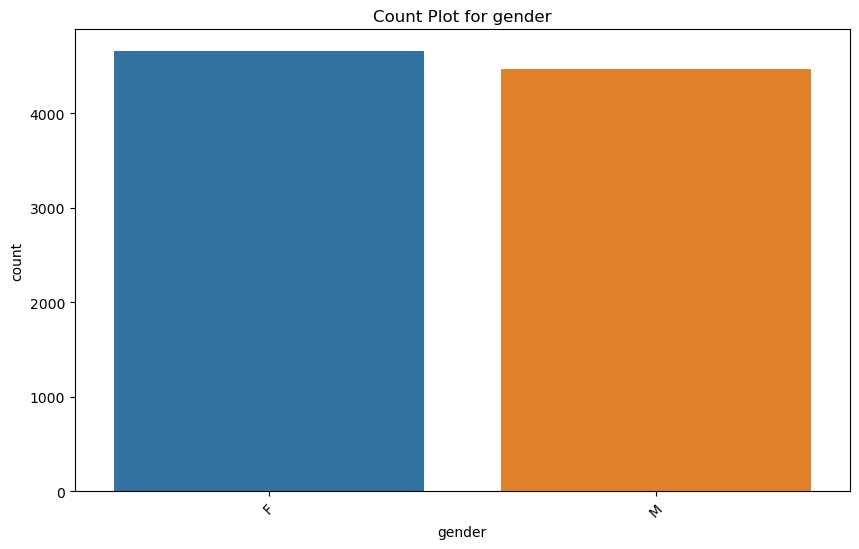

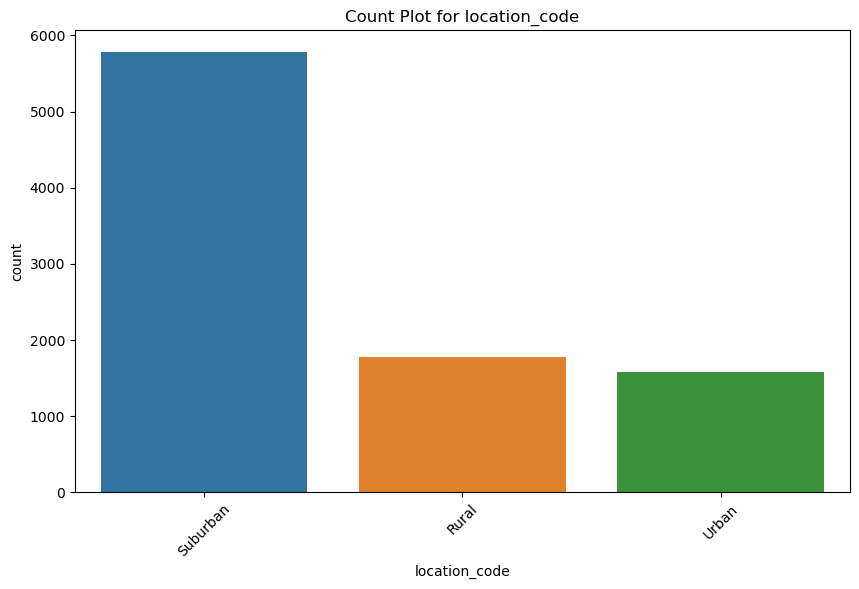

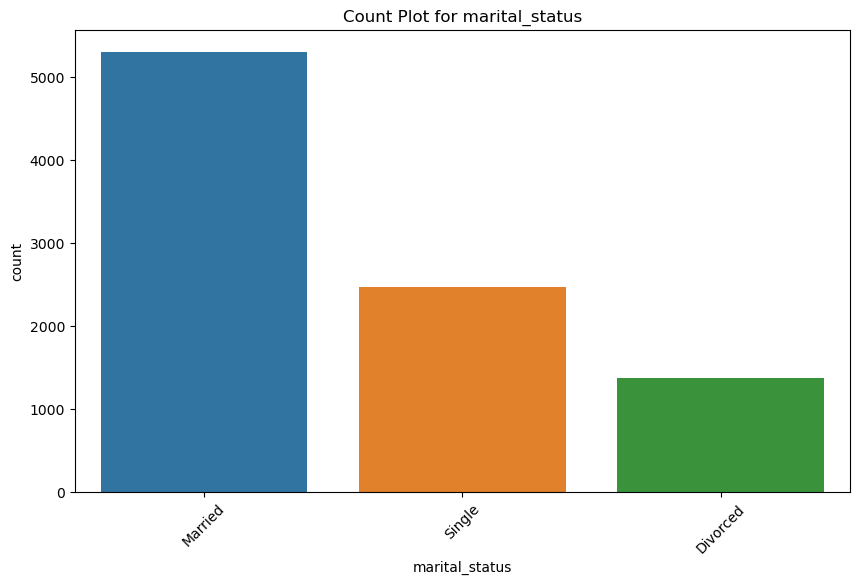

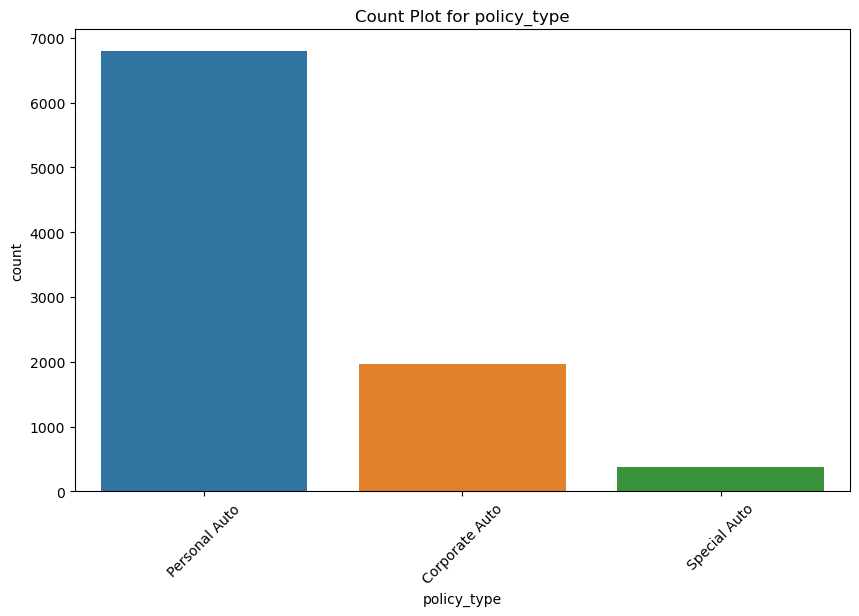

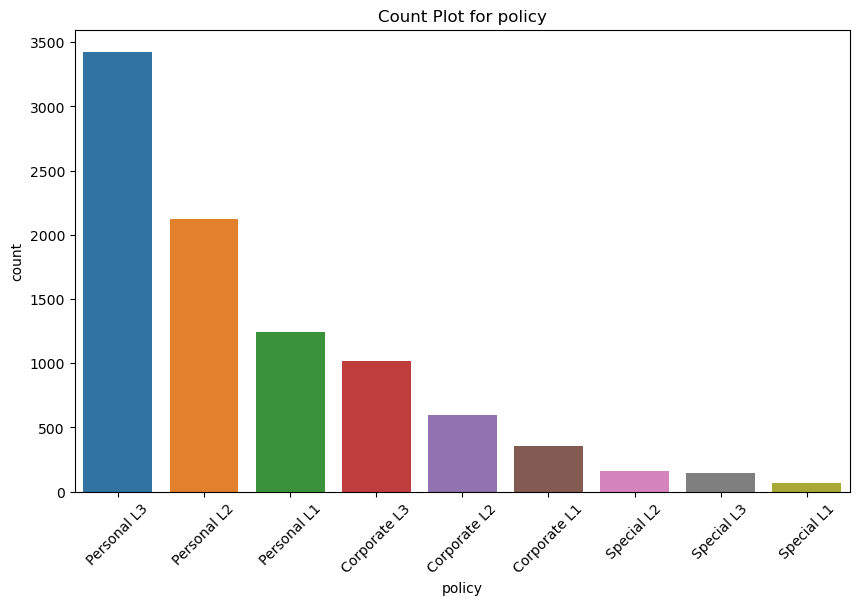

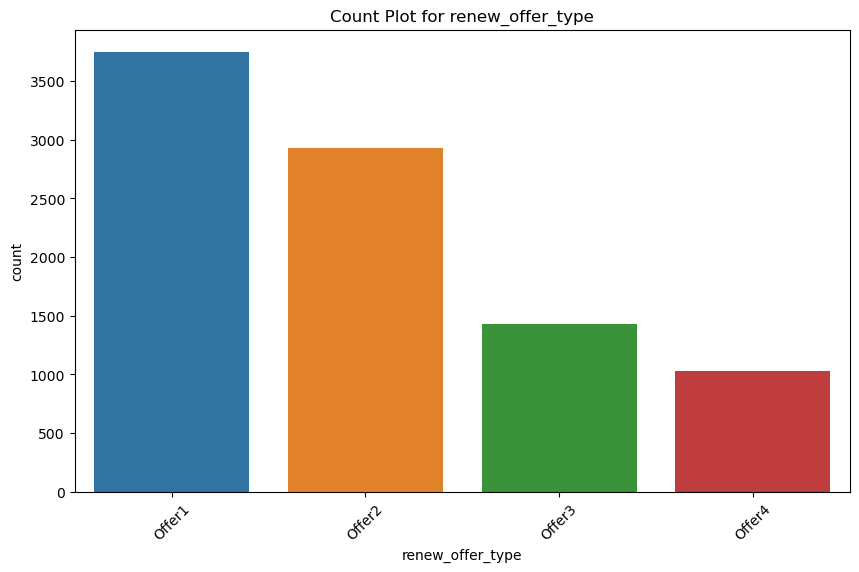

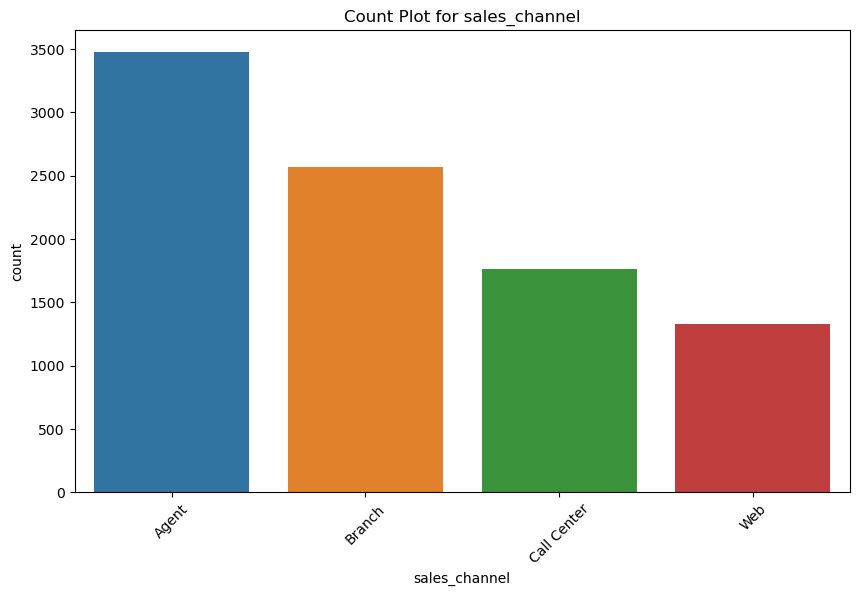

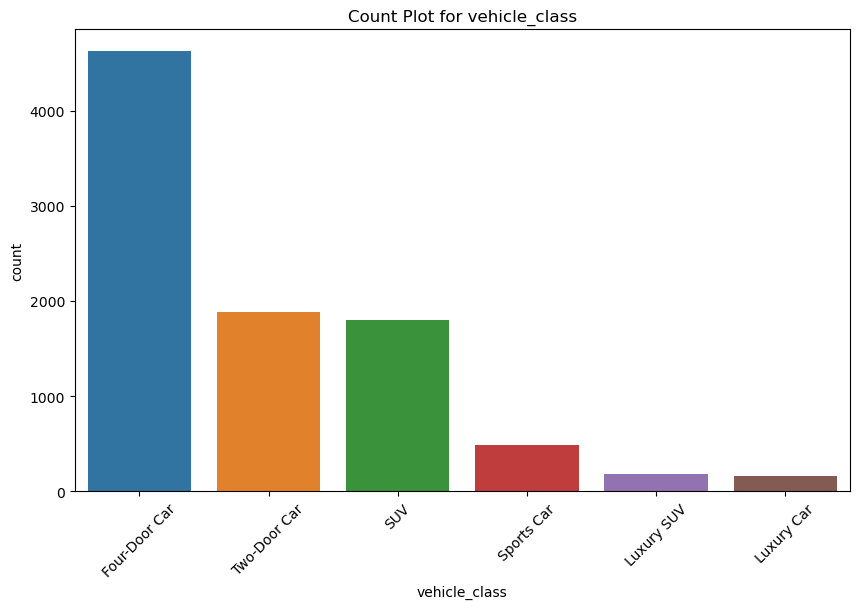

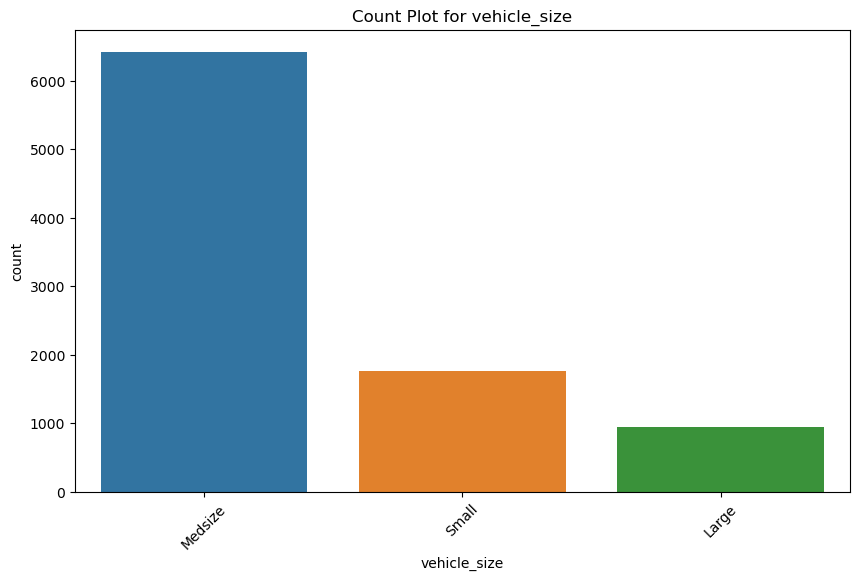

In [36]:
#2 
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each categorical column and create count plots
for column in categorical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=categorical_df, x=column, order=categorical_df[column].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count Plot for {column}')
    plt.show()


In [37]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [43]:
categorical_df['Day'] = categorical_df['effective_To_Date'].dt.day
categorical_df['Month'] = categorical_df['effective_To_Date'].dt.month
categorical_df['Week'] = categorical_df['effective_To_Date'].dt.isocalendar().week
categorical_df.columns

In [39]:
categorical_df_num=categorical_df.select_dtypes('number')
categorical_df_num.columns

Index([], dtype='object')

In [44]:
categorical_df= categorical_df.drop(['Day', 'Month', 'Week','Effective_To_Date'], axis=1)
categorical_df

In [ ]:
categorical_df.dtypes

# ![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

## Data Analysis Process
#### Remember the process:

- Case Study
- Get data
- Cleaning/Wrangling/EDA
- **Processing Data**
- **Modeling**
- **Validation**
- Reporting

### Instructions

Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target (total_claim_amount).

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

# ***********************************************
## Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
Encoder Type | Column 
-----------------|-----------------
One hot | state
Ordinal | coverage
Ordinal | employmentstatus
Ordinal | location code
One hot | marital status
One hot | policy type
One hot | policy
One hot | renew offercustomer_df
One hot | sales channel
One hot | vehicle class
Ordinal | vehicle size
Ordinal | education
One hot | response
One hot | gender

### Dummy code

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" values are to be represented in the same order.
# ******************************************************


6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

9. You can check also the `MLPRegressor` for this task!

10. Check and discuss the results.  


In [ ]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.
# separate the features from the labels


In [50]:
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [46]:
data = pd.concat([categorical_df,numerical_df], axis=1)
data.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,...,Two-Door Car,Medsize,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,...,Four-Door Car,Medsize,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,...,Two-Door Car,Medsize,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,...,SUV,Medsize,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,...,Four-Door Car,Medsize,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879


In [47]:
data.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [54]:
# Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.
file_path = "categorical.csv"

# Save the DataFrame to the CSV file
numerical_df.to_csv(file_path, index=False)  # Set index to False to exclude the index column

# Confirm that the DataFrame has been saved to the CSV file
print(f"DataFrame saved to {file_path}")

DataFrame saved to categorical.csv


In [56]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

# Lab | 1 | Train_test_split

In [69]:
# 1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
from sklearn.model_selection import train_test_split

In [70]:
# # 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=13)

print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

NameError: name 'X' is not defined

In [79]:
X_train.head()

NameError: name 'X_train' is not defined

In [80]:
X_test.head()

NameError: name 'X_test' is not defined

In [76]:
# 3. Use X_train_num to fit scalers.  Transform BOTH X_train_num and X_test_num.
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
print(X_train_norm.shape)
X_train_num_scale = pd.DataFrame(X_train_norm, index = X_train_num.index, columns=X_train_num.columns)
X_train_num_scale.head()

In [ ]:
X_test_norm = transformer.transform(X_test_num)
print(X_test_norm.shape)
X_test_num_scale = pd.DataFrame(X_test_norm, index = X_test_num.index, columns=X_test_num.columns)
X_test_num_scale.head()

In [ ]:
# 4. Encode the categorical variables X_train_cat and X_test_cat 
# (See the hint below for encoding categorical data!!!)
X_train_encoded = pd.get_dummies(X_train_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, drop_first=True)

In [ ]:
# 5. Since the model will only accept numerical data, check and make sure that every column is numerical,
# if some are not, change it using encoding.
display(X_train_encoded)
display(X_test_encoded)

In [ ]:
X_train_encoded = pd.get_dummies(X_train_cat, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_cat, drop_first=True)

X_train_num_scale
X_test_norm

In [ ]:
X_train = pd.concat([X_train_num_scale,X_train_encoded], axis = 1)
X_test = pd.concat([X_test_num_scale,X_test_encoded], axis = 1)

In [ ]:
X_test.head()

In [ ]:
# 6. Try a simple linear regression with all the data to see whether we are getting good results.
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

In [78]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)# 

In [ ]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
mse # MSE(Mean Squared Error) Lower (close to 0) the MSE, the closer is forecast to actual

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse # RMSE(Root Mean Squared Error) values between 0.2 and 0.5

In [ ]:
predictions_test = lm.predict(X_test) # start here for the new data 
predictions_test[:5]

In [ ]:
y_test[:5]

In [ ]:
# 7. Great! Now define a function that takes a list of models and train (and tests) 
# them so we can try a lot of them without repeating code.

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def train_and_evaluate_models(models, X, y, test_size=0.2, random_state=None):
    results = {}

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        mae = mean_absolute_error(y_test, y_pred)

        results[model_name] = {
            'R-squared': r2,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'Mean Absolute Error': mae
        }

    return results

In [ ]:
models_to_evaluate = [
    LinearRegression(),
    RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors=5),
    MLPRegressor(max_iter=1000, random_state=42)]

results = train_and_evaluate_models(models_to_evaluate, X_train_num_scale, y_train, test_size=0.2, random_state=42)

# Print the results for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

In [ ]:
# 8. Use the function to check LinearRegressor and KNeighborsRegressor.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Drop non-numeric columns
X = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the LinearRegressor
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions with LinearRegressor
linear_predictions = linear_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)

print(f'Linear Regressor Mean Squared Error: {linear_mse}')
print(f'Linear Regressor Mean Absolute Error: {linear_mae}')

# Create and fit the KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Make predictions with KNeighborsRegressor
knn_predictions = knn_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

print(f'KNeighbors Regressor Mean Squared Error: {knn_mse}')
print(f'KNeighbors Regressor Mean Absolute Error: {knn_mae}')





In [ ]:
# 9. You can check also the `MLPRegressor` for this task!
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Drop non-numeric columns
X = X.select_dtypes(include=['number'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the MLPRegressor
mlp_regressor = MLPRegressor()
mlp_regressor.fit(X_train, y_train)

# Make predictions with MLPRegressor
mlp_predictions = mlp_regressor.predict(X_test)

# Evaluate using mean squared error and mean absolute error
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)

print(f'MLP Regressor Mean Squared Error: {mlp_mse}')
print(f'MLP Regressor Mean Absolute Error: {mlp_mae}')